# **DNN**

In [102]:
#import nessasry library
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow import keras

In [103]:
#read data from google drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(5.0,5.0)

from google.colab import drive
drive.mount('/content/drive')


path = '/content/drive/MyDrive/Colab Notebooks/Health Insurance Cross Sell Prediction .csv'
df = pd.read_csv(path, encoding='cp1252', nrows=5000)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# **Data**

In [ ]:
#show the graph for target value
week_groups = df.groupby([df['Vehicle_Damage']]
                          )['Vehicle_Damage'].count()
week_groups.plot(kind='bar',figsize=(10,5),legend=None)

In [ ]:
#show the graph for target value
week_groups = df.groupby([df['Previously_Insured']]
                          )['Previously_Insured'].count()
week_groups.plot(kind='bar',figsize=(10,5),legend=None)

In [ ]:
#show the graph for target value
week_groups = df.groupby([df['Response']]
                          )['Response'].count()
week_groups.plot(kind='bar',figsize=(10,5),legend=None)

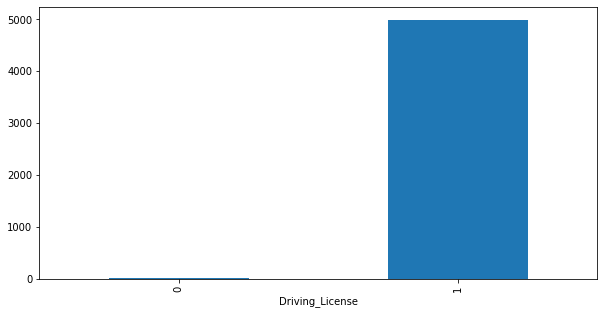

In [ ]:
#show the graph for target value
week_groups = df.groupby([df['Driving_License']]
                          )['Driving_License'].count()
week_groups.plot(kind='bar',figsize=(10,5),legend=None)

# **Binary Data**

In [104]:
#change the character data to integer
df.Gender = pd.Categorical(df.Gender).codes
df.Vehicle_Age = pd.Categorical(df.Vehicle_Age).codes
df.Vehicle_Damage = pd.Categorical(df.Vehicle_Damage).codes

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


# **Data Needed**

In [53]:
#Set the X and Y value
Y = np.array(df['Vehicle_Damage'])
X = np.array(df.drop(["Vehicle_Damage"], axis = 1))

In [106]:
#Set the X and Y value
Y = np.array(df['Previously_Insured'])
X = np.array(df.drop(["Previously_Insured"], axis = 1))

In [92]:
#Set the X and Y value
Y = np.array(df['Response'])
X = np.array(df.drop(["Response"], axis = 1))

In [83]:
#Set the X and Y value
Y = np.array(df['Driving_License'])
X = np.array(df.drop(["Driving_License"], axis = 1))

# **Train**

In [128]:
#Train the X and Y value
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750, 11)
(1250, 11)
(3750,)
(1250,)


# **Scaled**

In [129]:
#Scaled the X_train value and X_test value to proper format
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Grid Search**

In [ ]:
#Set up the grid search model and fit it with target value
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

parameters = {'loss':('squared_loss', 'huber'), 'penalty':('l2', 'l1', 'elasticnet'), 
              'alpha':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1], 
              'max_iter':[5000,10000,20000]}

model3 = SGDRegressor(random_state = 5)

clf = GridSearchCV(model3, parameters)

clf.fit(X_train_scaled,y_train)

In [ ]:
#result of grid search
clf.best_params_

{'alpha': 1e-05,
 'loss': 'squared_loss',
 'max_iter': 5000,
 'penalty': 'elasticnet'}

In [ ]:
#result of grid search
clf.best_score_

0.126869451250987

In [ ]:
#result of grid search
clf.best_estimator_.intercept_

array([0.12339893])

In [ ]:
#result of grid search
clf.best_estimator_.coef_

array([ 0.01367225,  0.00181817, -0.01690996,  0.00656807, -0.00411161,
       -0.04043473, -0.00386588,  0.07334963,  0.01043588, -0.0209462 ,
       -0.00357928])

# **Model Tuning**

In [109]:
#Set up the DNN model
L1 = 200
L2 = 100

model = Sequential()
model.add(Dense(L1, input_dim=11, activation='relu'))
model.add(Dense(L2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
#Compile the DNN model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [130]:
#Fit the trained data with DNN model builded
history = model.fit(X_train_scaled,y_train,epochs=10,batch_size=5,validation_data=(X_test_scaled,y_test))

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1990 - accuracy: 0.9341 - val_loss: 0.2651 - val_accuracy: 0.9168
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1614 - accuracy: 0.9405 - val_loss: 0.2549 - val_accuracy: 0.9240
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1450 - accuracy: 0.9427 - val_loss: 0.2590 - val_accuracy: 0.9224
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1343 - accuracy: 0.9477 - val_loss: 0.3068 - val_accuracy: 0.9064
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1329 - accuracy: 0.9491 - val_loss: 0.2949 - val_accuracy: 0.9088
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1253 - accuracy: 0.9491 - val_loss: 0.2985 - val_accuracy: 0.9032
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1186 - accuracy: 0.9560 - val_loss: 0.3517 - val_accuracy: 0.8968
Epoch 

In [132]:
#Get the loss and accurancy of each ecphoce
loss, acc = model.evaluate(X_test_scaled,y_test)

40/40 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8976


In [133]:
#Set the variable with the history get from model fit
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [134]:
epochs = range(1, len(acc)+1)

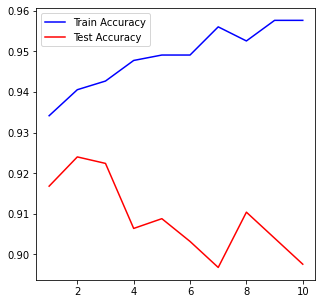

In [137]:
#show the graph of the accurancy 
plt.plot(epochs, acc,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.show()

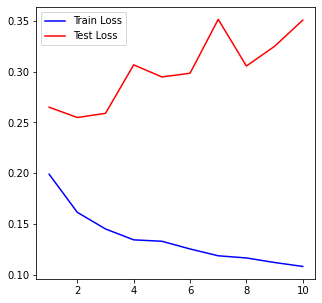

In [138]:
#show the graph of the loss
plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()